# 回帰直線を引く

In [2]:
import numpy as np
import matplotlib.pyplot as plt

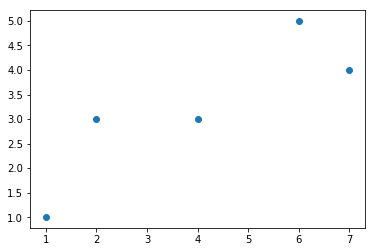

In [11]:
x = np.array([1,2,4,6,7])
y = np.array([1,3,3,5,4])
plt.scatter(x,y)

## 原点を通る１次関数
誤差関数が最小となるような傾きを設定(解析的に求まる)

In [12]:
def reg1dim1(x, y):
    a = np.dot(x, y)/(x**2).sum()
    return a

In [13]:
a = reg1dim1(x,y)

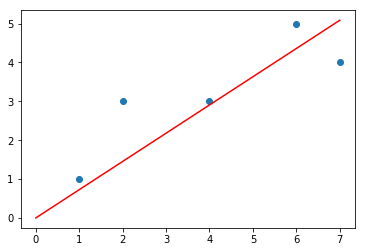

In [15]:
plt.scatter(x,y)
xmax = x.max()
plt.plot([0,xmax], [0, a*xmax], color='r')

## １次関数
切片も考慮しフィッテイング

In [17]:
def reg2dim1(x, y):
    n = len(x)
    a = (np.dot(x, y) - x.sum()*y.sum()/n )/((x**2).sum() - (x.sum())**2/n)
    b = (y - a * x).sum() /n
    return a, b

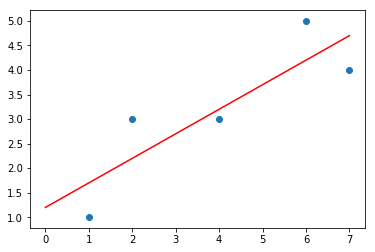

In [18]:
a, b = reg2dim1(x, y)

plt.scatter(x,y)
xmax = x.max()
plt.plot([0,xmax], [0 + b, a*xmax + b], color='r')

# 一般的な線形回帰
$x \to \boldsymbol{x}$ : 特徴量が1つから複数に

In [20]:
from scipy import linalg

In [50]:
class LinearRegression:
    def __init__(self):
        self.w_ = None
        
    def fit(self, x, t):
        Xtil = np.c_[np.ones(X.shape[0]), X] # concatecate offset terms
        A = np.dot(Xtil.T, Xtil)
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        if X.ndim  == 1:
            X = X.reshape(1, -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

Generate artificial data include Gaussian Noise

In [51]:
from mpl_toolkits.mplot3d import axes3d

n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n, 2)) * scale 
# (n, 2) size array of random number [0,1] * 10

w0 = 1
w1 = 2
w2 = 3

y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)
# np.random.randn(n) : normal distributed random numbers

Fit $w$ to artificial data

In [53]:
model = LinearRegression()
model.fit(X, y)
print("coefficeinces :",model.w_)
print("prediction for [1,1] :", model.predict(np.array([1,1])))

coefficeinces : [1.11450326 1.95737004 3.00295751]
prediction for [1,1] : [6.07483081]


Plot

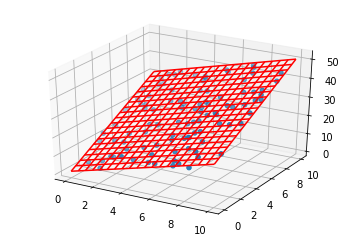

In [59]:
xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                                np.linspace(0, scale, 20))
# prediction values
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + 
        model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# data
ax.scatter(X[:, 0], X[:, 1], y)
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')

Wine quality data

In [60]:
import csv

In [61]:
Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimeter = ";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype = np.float64)

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'

In [ ]:
np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_X = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

In [ ]:
model = LinearRegression
model.fit(train_x, train_)

In [ ]:
y = model.fit(test_X)

In [62]:
print("prediction and answer")

for i in range(5):
    print("{:1.0f} {:5.3f}".format(test_y[i], y[i]))
    
print("RMSE = ", np.sqrt( ((test_y - y)**2).mean() )

prediction and answer


NameError: name 'test_y' is not defined

# Ridge regression

In [71]:
class RidgeRegression:
    def __init__(self, lambda_=1):
        self.w_ = None
        self.lambda_ = lambda_
        
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X] # concatecate offset terms
        A = np.dot(Xtil.T, Xtil) + self.lambda_ * np.eye(Xtil.shape[1])
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        if X.ndim  == 1:
            X = X.reshape(1, -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

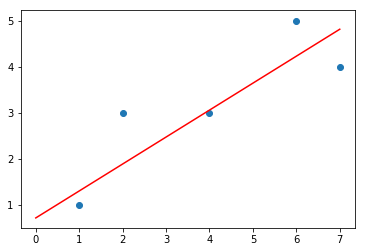

In [75]:
x = np.array([1,2,4,6,7])
y = np.array([1,3,3,5,4])
model = RidgeRegression(1.)
model.fit(x, y)
b, a = model.w_

plt.scatter(x,y)
xmax = x.max()
plt.plot([0,xmax], [b, a*xmax + b], color='r')

In [76]:
from mpl_toolkits.mplot3d import axes3d

n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n, 2)) * scale 
# (n, 2) size array of random number [0,1] * 10

w0 = 1
w1 = 2
w2 = 3

y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)
# np.random.randn(n) : normal distributed random numbers

model = RidgeRegression(1.)
model.fit(X, y)

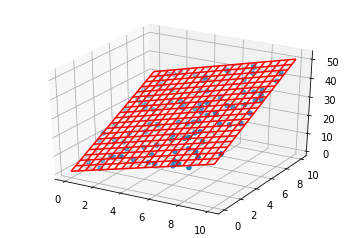

In [77]:
xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                                np.linspace(0, scale, 20))
# prediction values
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + 
        model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# data
ax.scatter(X[:, 0], X[:, 1], y)
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')